# Presentation
___

## Homeless Dogs of America

In [1]:
# chart that shows how many strays there are 
# show that shelters are overrun and crowded - to the point where we have to start killing them off

In [2]:
# show chart of how many dogs are adopted from breedists and mill than from shelters

In [3]:
%matplotlib inline
import pandas as pd
import json
import folium
from folium import plugins
from IPython.display import HTML, Image

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/IO9d2PpP7tQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

---

In [5]:
# talk about californias legislation to ban puppy mills

## What does a typical animal shelter look like?

In [6]:
Image(url="https://www.modbee.com/latest-news/ngjzby/picture2715436/alternates/FREE_1140/LIVE_p1215_15a1shelter5.source.prod_affiliate.11.jpg")

---

## Where are dogs most frequently found?

In [7]:
coordinates = []
with open('../data/geocodes.txt') as f:
    for line in f:
        coordinates.append(json.loads(line))

In [8]:
coords = pd.DataFrame(coordinates)
coords['lat'] = coords.lat.astype(float)
coords['lng'] = coords.lng.astype(float)

In [9]:

m = folium.Map([30.2672, -97.7431], zoom_start=11)
for index, row in coords.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=15,
                        fill_color="#3db7e4",
                       ).add_to(m)

In [20]:
m = folium.Map([30.2672, -97.7431], zoom_start=11)
coordArr = coords[['lat', 'lng']].as_matrix()
m.add_children(plugins.HeatMap(coordArr, radius=12))
m

---

##  Can we predict if a dog in the shelter will be adopted?

In [11]:
columns = ["Model","Features","Scaler","Accuracy"]
results = pd.DataFrame()
results = results.append(pd.DataFrame(["KNeighborsClassifier","Features1","RobustScaler",0.718]).T)
results = results.append(pd.DataFrame(["RandomForestClassifier","Features","Normalizer",0.736]).T)
results = results.append(pd.DataFrame(["LinearSVC","Features","RobustScaler",0.543]).T)
results = results.append(pd.DataFrame(["BaggingClassifier","Features","Normalizer",0.735]).T)
results.columns = columns
results.set_index("Model",inplace=True)
results

,Features,Scaler,Accuracy
Model,,,
KNeighborsClassifier,Features1,RobustScaler,0.718
RandomForestClassifier,Features,Normalizer,0.736
LinearSVC,Features,RobustScaler,0.543
BaggingClassifier,Features,Normalizer,0.735


**Accuracy of Our Models on Dogs in the Shelter**

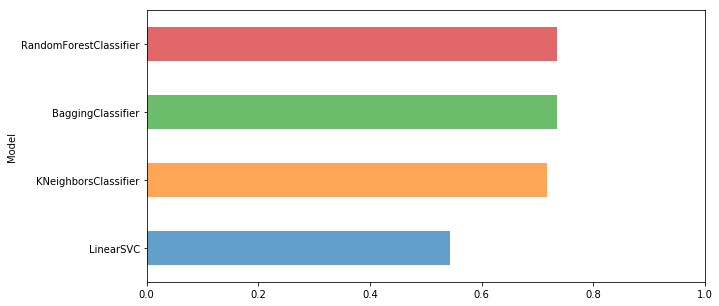

In [12]:
results.Accuracy.sort_values().plot.barh(alpha=0.7, figsize = (10,5),xlim=(0.0,1))

---

In [13]:
# with 70% accuracy

##  Can we predict if YOUR dog would be saved from a shelter?

In [14]:
columns = ["Model","Features","Scaler","Accuracy"]
your_results = pd.DataFrame()
your_results = your_results.append(pd.DataFrame(["KNeighborsClassifier","Your_Features1","RobustScaler",0.585]).T)
your_results = your_results.append(pd.DataFrame(["RandomForestClassifier","Your_Features2","StandardScaler",0.592]).T)
your_results = your_results.append(pd.DataFrame(["LinearSVC","Your_Features","Normalizer",0.568]).T)
your_results = your_results.append(pd.DataFrame(["BaggingClassifier","Your_Features2","Normalizer",0.590]).T)
your_results.columns = columns
your_results.set_index("Model",inplace=True)
your_results

,Features,Scaler,Accuracy
Model,,,
KNeighborsClassifier,Your_Features1,RobustScaler,0.585
RandomForestClassifier,Your_Features2,StandardScaler,0.592
LinearSVC,Your_Features,Normalizer,0.568
BaggingClassifier,Your_Features2,Normalizer,0.59


**Accuracy of Models**

In [15]:
# with 50% accuracy

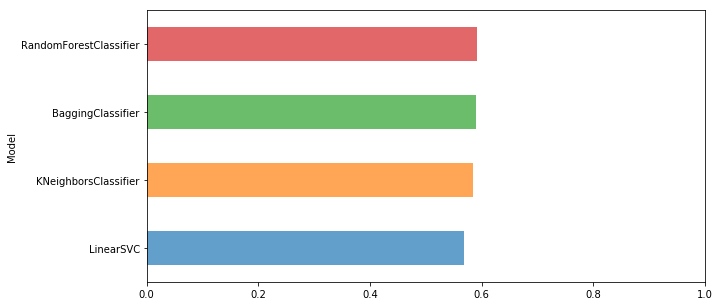

In [16]:
your_results.Accuracy.sort_values().plot.barh(alpha=0.7, figsize = (10,5), xlim=(0.0,1))

In [17]:
columns = ["Dog","Intake Condition","Intake Type","Sex","Fixed","Age In", "Named","Outcome Type"]
dogs = pd.DataFrame()
dogs = dogs.append(pd.DataFrame(["Dog 1", "Sick","Owner Surrender","Male","Yes",15,"Yes","Euthanasia"]).T)
dogs = dogs.append(pd.DataFrame(["Dog 2", "Normal","Stray","Female","No",2,"No","Adoption"]).T)
dogs = dogs.append(pd.DataFrame(["Dog 3", "Feral","Stray","Male","No",4,"No","Transfer"]).T)
dogs.columns = columns
dogs.set_index("Dog",inplace=True)
dogs

,Intake Condition,Intake Type,Sex,Fixed,Age In,Named,Outcome Type
Dog,,,,,,,
Dog 1,Sick,Owner Surrender,Male,Yes,15,Yes,Euthanasia
Dog 2,Normal,Stray,Female,No,2,No,Adoption
Dog 3,Feral,Stray,Male,No,4,No,Transfer


---

## Issues
### Data Entry Errors
* Couldn't Use Breed (Too Many)
* Couldn't Use Color (Too Many)
* Couldn't Use Name (Too Many)

---

## Conclusion

### Adopt a Dog Today!

In [18]:
Image(url="https://twistedsifter.files.wordpress.com/2014/12/two-dogs-adoption-happiness-then-and-now-sad-happy.jpg?w=800&h=550")

In [19]:

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
             if (code_show){
                 $('div.input').hide();
             } else {
                 $('div.input').show();
             }
             code_show = !code_show
            } 
        $( document ).ready(code_toggle);
    </script>
    
    <form action="javascript:code_toggle()"><input type="submit" value="Show code."></form>
''')